# 1. Explore Original Data (before data cleaning)

## (1) Import library needed.
## (2) Read CSV
## (3) View data info
## (4) View Data Sample

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
sns.set()

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
11069,11070,80000.0,2,1,2,24,0,0,0,0,...,42663.0,43136.0,43676.0,3000.0,7139.0,6000.0,1694.0,2000.0,3000.0,0
20544,20545,160000.0,1,1,2,30,-1,0,-1,-1,...,5431.0,6683.0,22285.0,1007.0,11907.0,5437.0,6693.0,22296.0,23500.0,0
16786,16787,90000.0,1,2,2,29,0,0,0,-2,...,0.0,0.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0
16671,16672,440000.0,1,3,1,35,0,0,0,0,...,12651.0,13211.0,23600.0,2017.0,3000.0,3019.0,5011.0,23748.0,13633.0,0
5510,5511,200000.0,1,1,2,30,-2,-2,-1,-1,...,993.0,2494.0,3890.0,2505.0,5268.0,996.0,2501.0,3896.0,5189.0,0
9750,9751,170000.0,1,1,2,30,0,0,0,0,...,124934.0,127918.0,130782.0,4337.0,6000.0,5000.0,5000.0,5000.0,4898.0,0
10591,10592,210000.0,2,1,2,33,-1,-1,-1,-1,...,2046.0,17239.0,3680.0,1053.0,2992.0,2046.0,17239.0,3680.0,0.0,0
24900,24901,210000.0,1,2,2,32,0,0,0,0,...,70484.0,36308.0,33201.0,3664.0,3900.0,2868.0,3000.0,2000.0,2000.0,1
8515,8516,410000.0,1,1,2,29,0,0,0,0,...,44016.0,38728.0,36540.0,3037.0,3015.0,3549.0,5029.0,4325.0,6029.0,0
22655,22656,400000.0,2,2,1,39,-1,2,-1,-1,...,8841.0,18612.0,6115.0,31.0,5316.0,8858.0,18769.0,6115.0,11000.0,0


## Check unique value of each categorical variable

In [3]:
print('SEX ' + str(sorted(df['SEX'].unique())))
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))
print('PAY_0 ' + str(sorted(df['PAY_0'].unique())))
print('default.payment.next.month ' + str(sorted(df['default.payment.next.month'].unique())))

SEX [1, 2]
EDUCATION [0, 1, 2, 3, 4, 5, 6]
MARRIAGE [0, 1, 2, 3]
PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
default.payment.next.month [0, 1]


# 2. Data Cleaning

###### (1) Value in EDUCATION not define completely. Since 0, 4, 5, 6 all being define as other (or unknown), will be better to group them together and name it 4.
###### (2) Column name 'default.payment.next.month' is better to name it 'DEFAULT'. Shorter and without dot that could probably cause error in code.
###### (3) Column name 'PAY_0' would be better to name it 'PAY_1', to make it consistent with 'BILL_AMT1' and 'PAY_AMT1'.

In [4]:
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[fill, 'EDUCATION'] = 4

print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))

EDUCATION [1, 2, 3, 4]


In [5]:
df = df.rename(columns={'default.payment.next.month': 'DEFAULT', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Cleaned

###### - Value 0, 5, 6 in EDUCATION all been replaced with 4 to represent category of other.
###### - Column PAY_0 renamed to PAY_1.
###### - Column default.payment.next.month renamed to DEFAULT We have clean our data and ready for further analysis.

# 3. Explore Data with Visualization

### Before looking at charts, take a look at some common statistical output in table below.

##### - From the mean of DEFAULT, it shows around 22% default.
##### - Refer to PAY_1 ~ PAY_6, at least 75% of client are not in payment delay status





In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## Visualize with Heatmap
#### Look at DEFAULT correlation with other variables.

##### Lowest is -0.15 correlate with LIMIT_BAL. : negative correlation indicates higher Credit Limit, lower Default.

##### Highest is 0.32 correlate with PAY_1 : positive correlation indicates longer period of Delay Payment, higher Default.

##### In general PAY_1 ~ PAY_6 have higher correlation to DEFAULT compare to other variables : clients payment behaviour give strong indication on Default

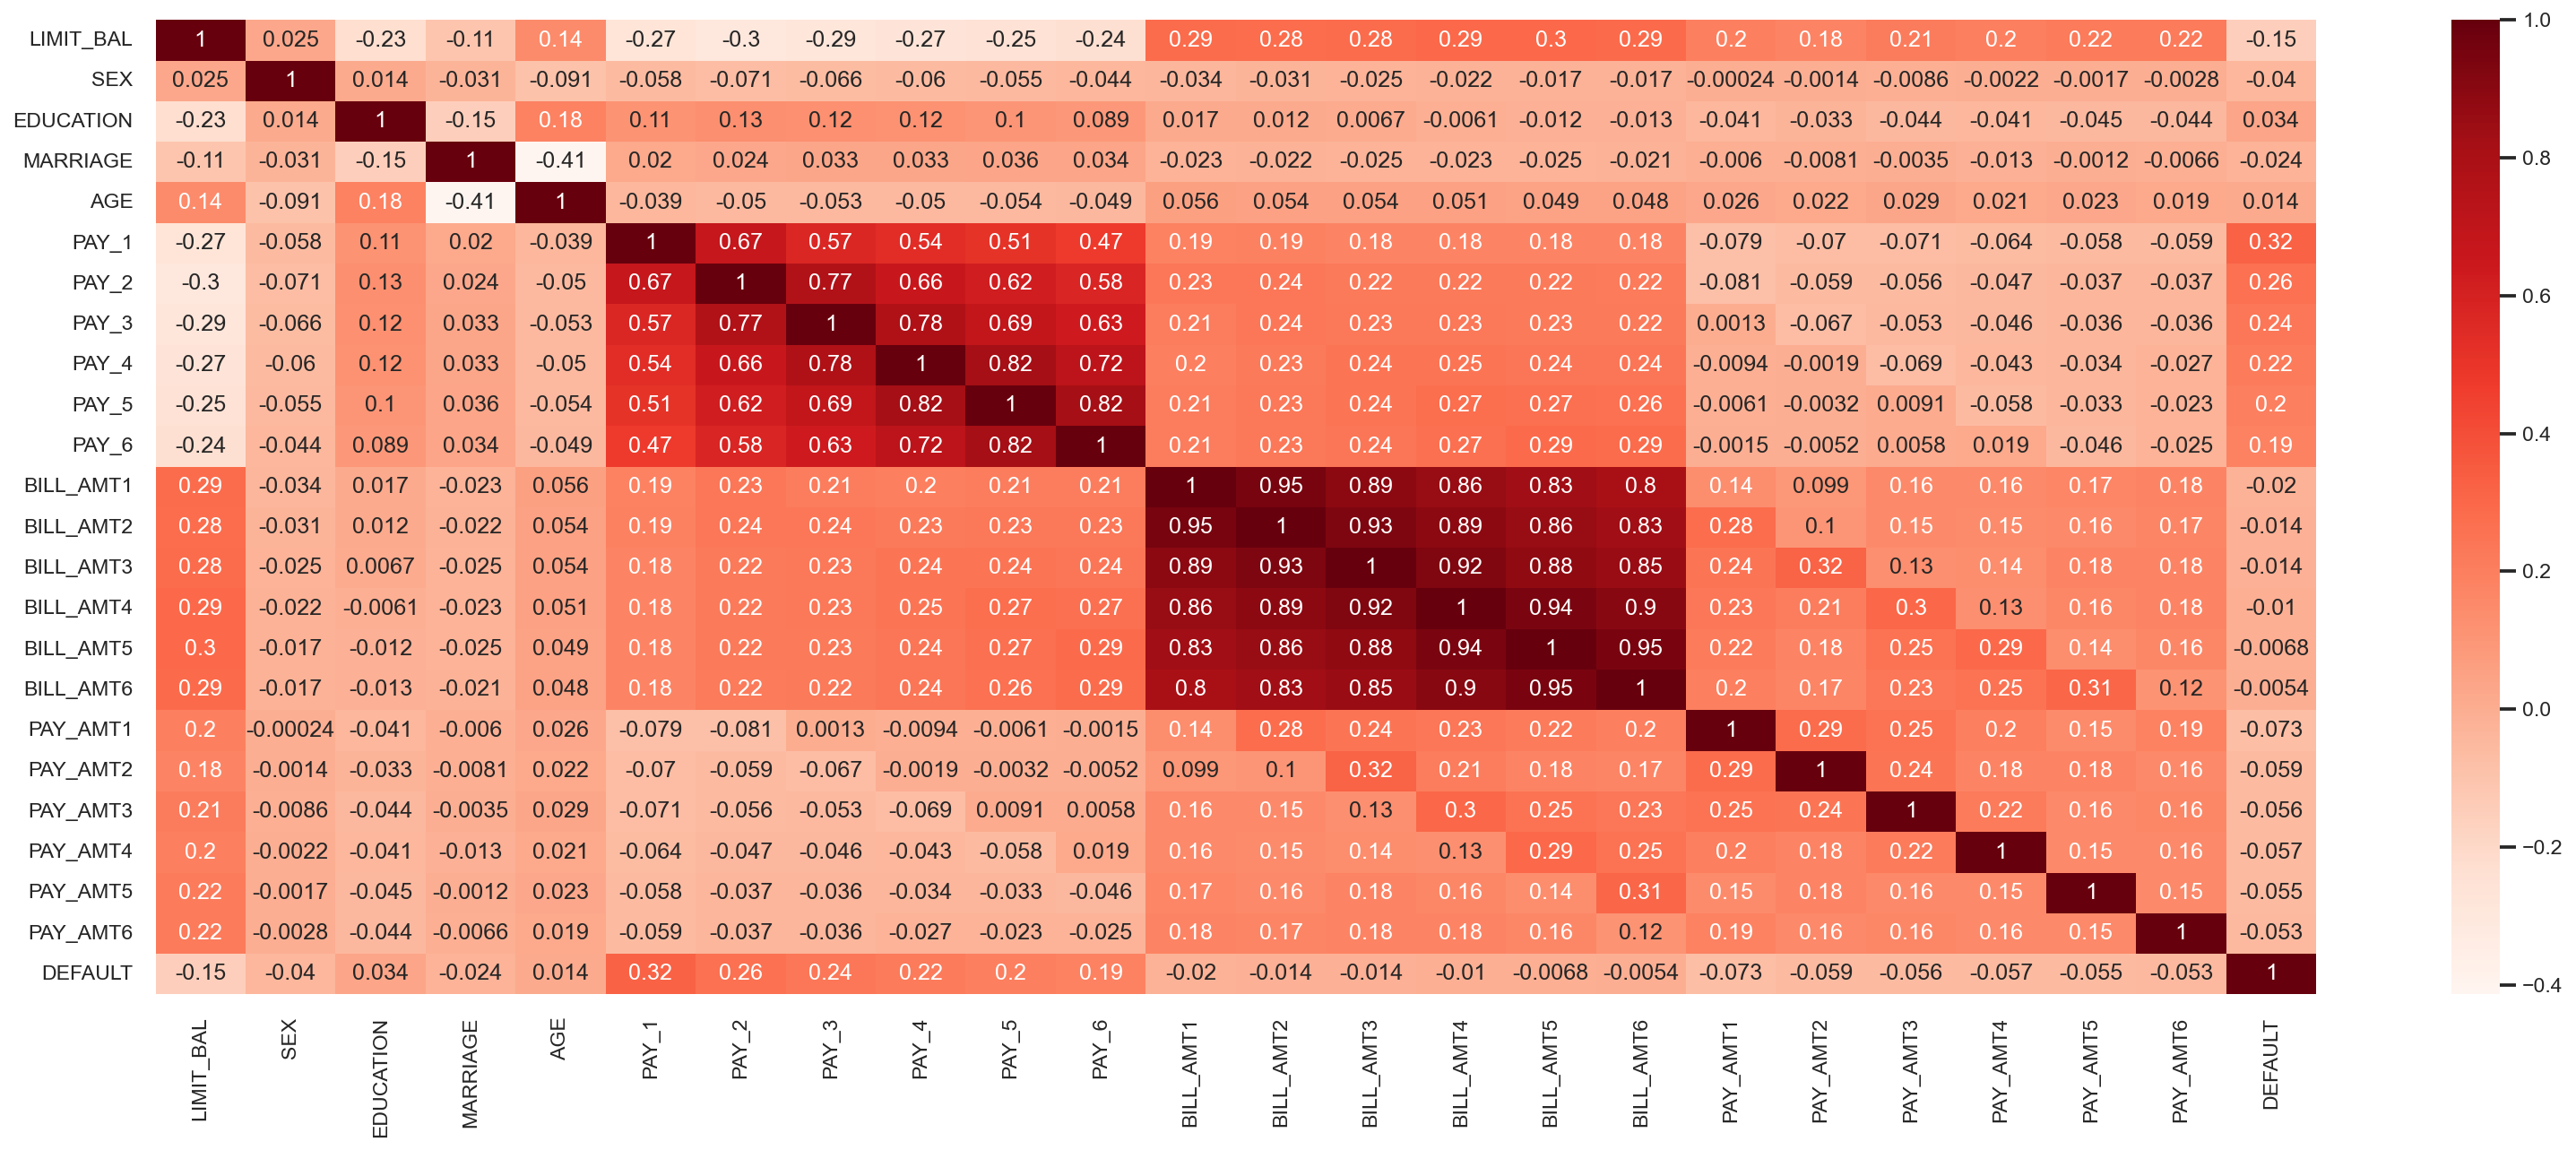

In [7]:
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(df.iloc[:,1:].corr(), cmap='Reds', annot=True);

## Visualize Categorical Data with Barchart

Explore Education vs. Default.

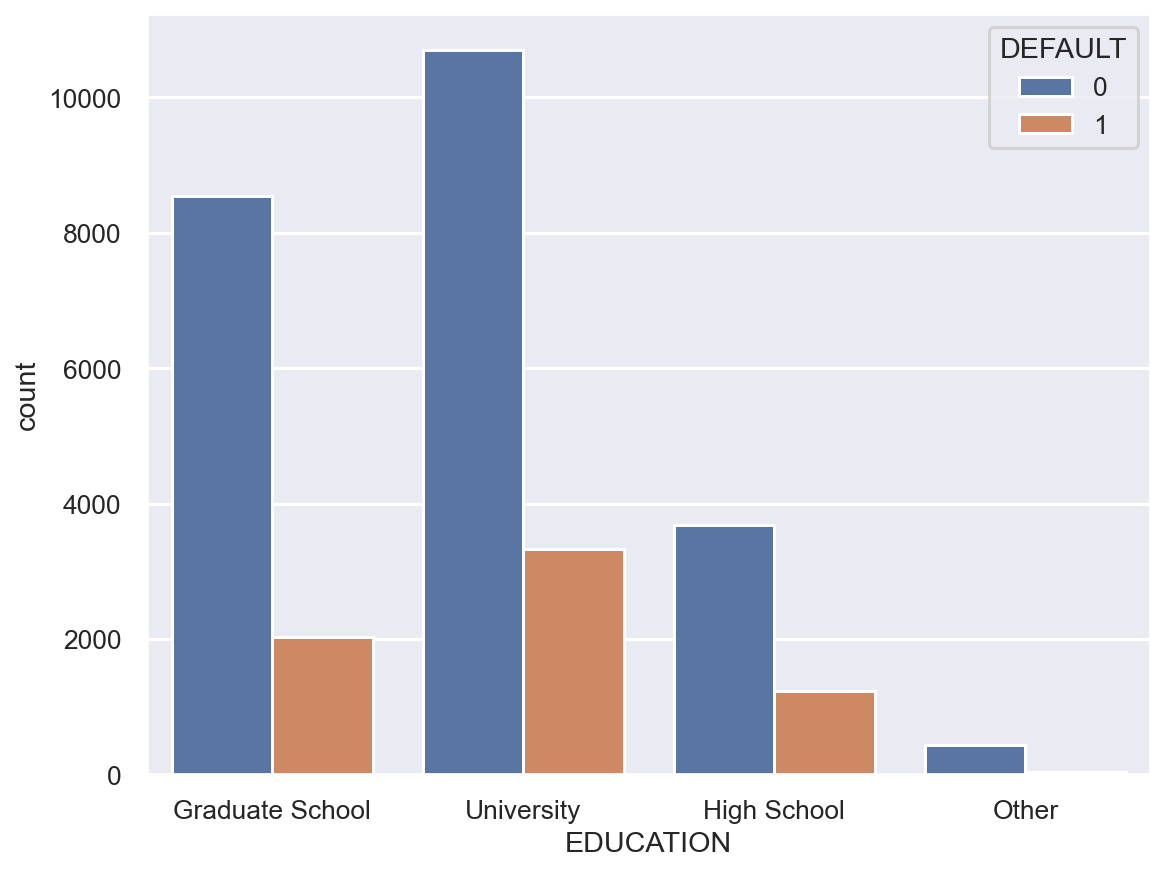

In [8]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=df)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

Show Education level and Default Count in table

In [9]:
default0 = df.groupby(df['EDUCATION'][df['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['EDUCATION'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('EDUCATION').size().reset_index(name='TOTAL')

eduTable = default0.join(default1['DEFAULT']).join(total['TOTAL'])
eduTable['EDUCATION'] = ['Graduate School','University','High School','Other']

eduTable

,EDUCATION,NOT_DEFAULT,DEFAULT,TOTAL
0,Graduate School,8549,2036,10585
1,University,10700,3330,14030
2,High School,3680,1237,4917
3,Other,435,33,468


Turn Default Count into Percentage

In [10]:
eduTable['NOT_DEFAULT'] = round((default0['NOT_DEFAULT']/total['TOTAL'])*100,2)
eduTable['DEFAULT'] = round((default1['DEFAULT']/total['TOTAL'])*100,2)

eduPct = eduTable.iloc[:,0:3]
eduPct = eduPct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

eduPct

,EDUCATION,NOT_DEFAULT(%),DEFAULT(%)
0,Graduate School,80.77,19.23
1,University,76.27,23.73
2,High School,74.84,25.16
3,Other,92.95,7.05


Visualize again using Stacked chart

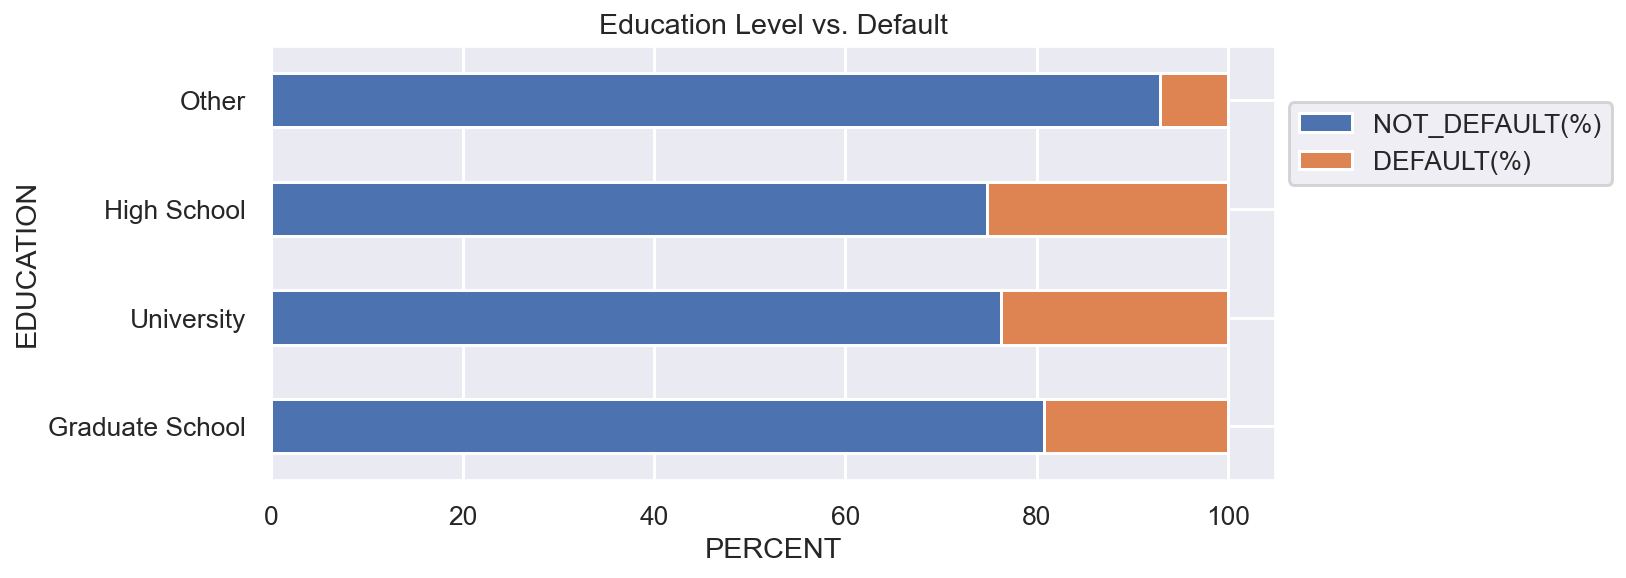

In [11]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_context("talk", font_scale=0.8)

ax = eduPct.plot(x='EDUCATION', kind='barh', stacked=True, title='Education Level vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()

### Summary (Education Level vs. Default)
###### Although the Default Count for High School is lower than Graduate School & University. But in terms of Default Percentage, those with High School level have higher chance of Default.

Explore Marriage vs. Default (with same method

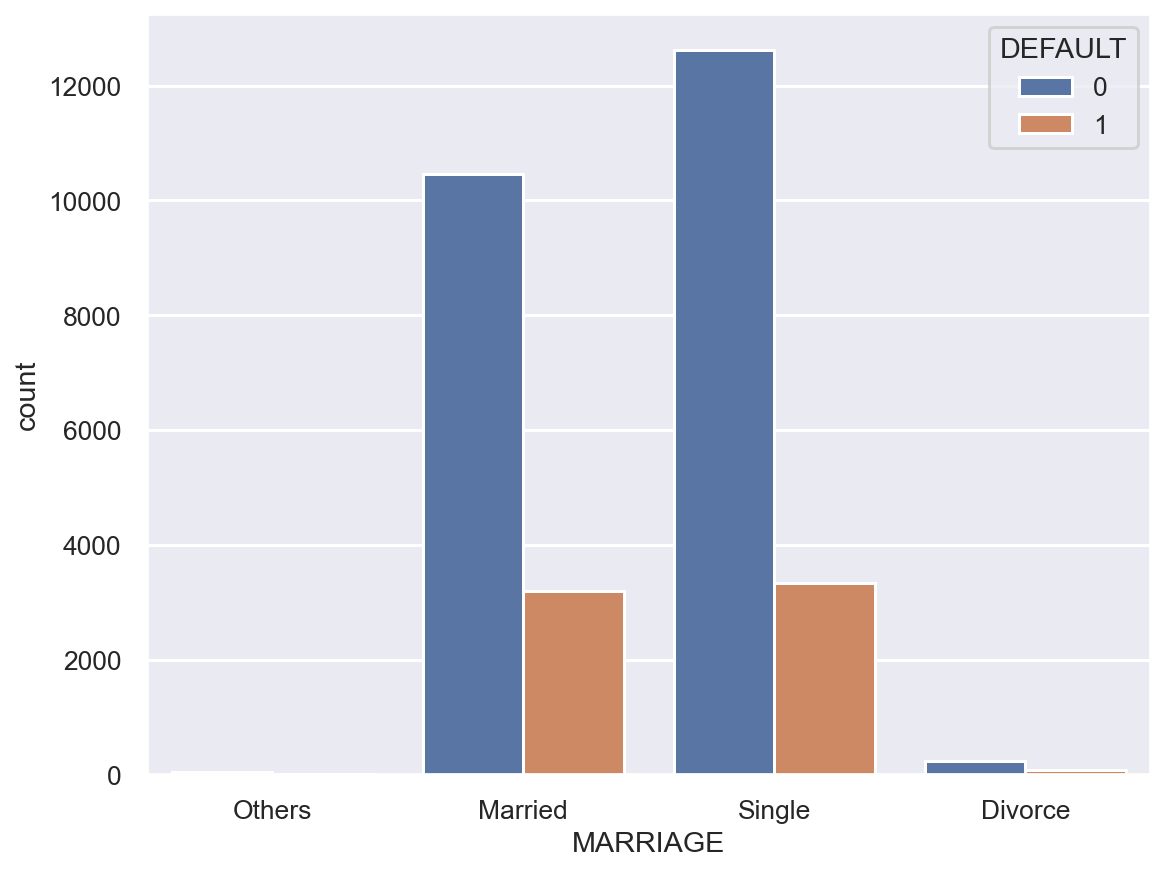

In [12]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

marri = sns.countplot(x="MARRIAGE", hue='DEFAULT', data=df )
marri.set_xticklabels(['Others','Married','Single','Divorce'])
plt.show()

In [13]:
default0 = df.groupby(df['MARRIAGE'][df['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['MARRIAGE'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('MARRIAGE').size().reset_index(name='TOTAL')

marriTable = default0.join(default1['DEFAULT']).join(total['TOTAL'])
marriTable['MARRIAGE'] = ['Others','Married','Single','Divorce']

marriTable

,MARRIAGE,NOT_DEFAULT,DEFAULT,TOTAL
0,Others,49,5,54
1,Married,10453,3206,13659
2,Single,12623,3341,15964
3,Divorce,239,84,323


In [14]:
marriTable['NOT_DEFAULT'] = round((default0['NOT_DEFAULT']/total['TOTAL'])*100,2)
marriTable['DEFAULT'] = round((default1['DEFAULT']/total['TOTAL'])*100,2)

marriPct = marriTable.iloc[:,0:3]
marriPct = marriPct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

marriPct

,MARRIAGE,NOT_DEFAULT(%),DEFAULT(%)
0,Others,90.74,9.26
1,Married,76.53,23.47
2,Single,79.07,20.93
3,Divorce,73.99,26.01


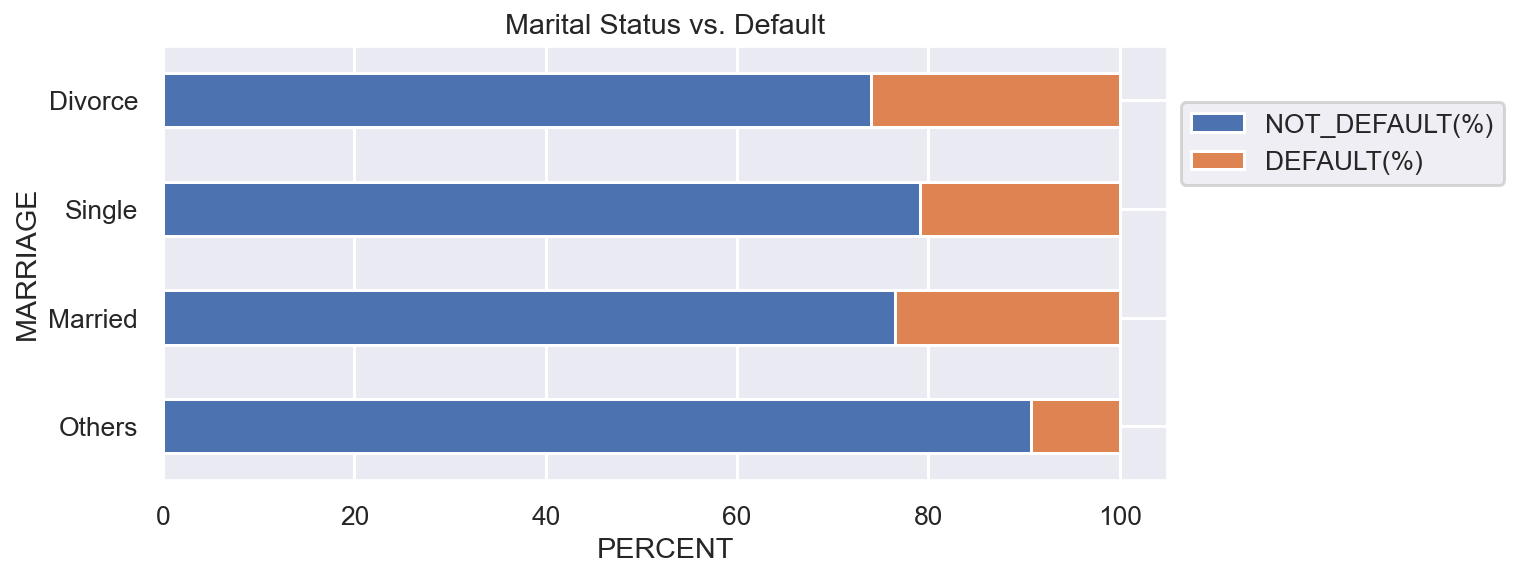

In [15]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_context("talk", font_scale=0.8)

ax = marriPct.plot(x='MARRIAGE', kind='barh', stacked=True, title='Marital Status vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()

## Explore Credit Behaviour
##### Now we explore PAY_1. As information in the heatmap, PAY_1 is the higest positive correlated variable.

#### PAY_1: Repayment status in September, 2005 (most recent month)

#### (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

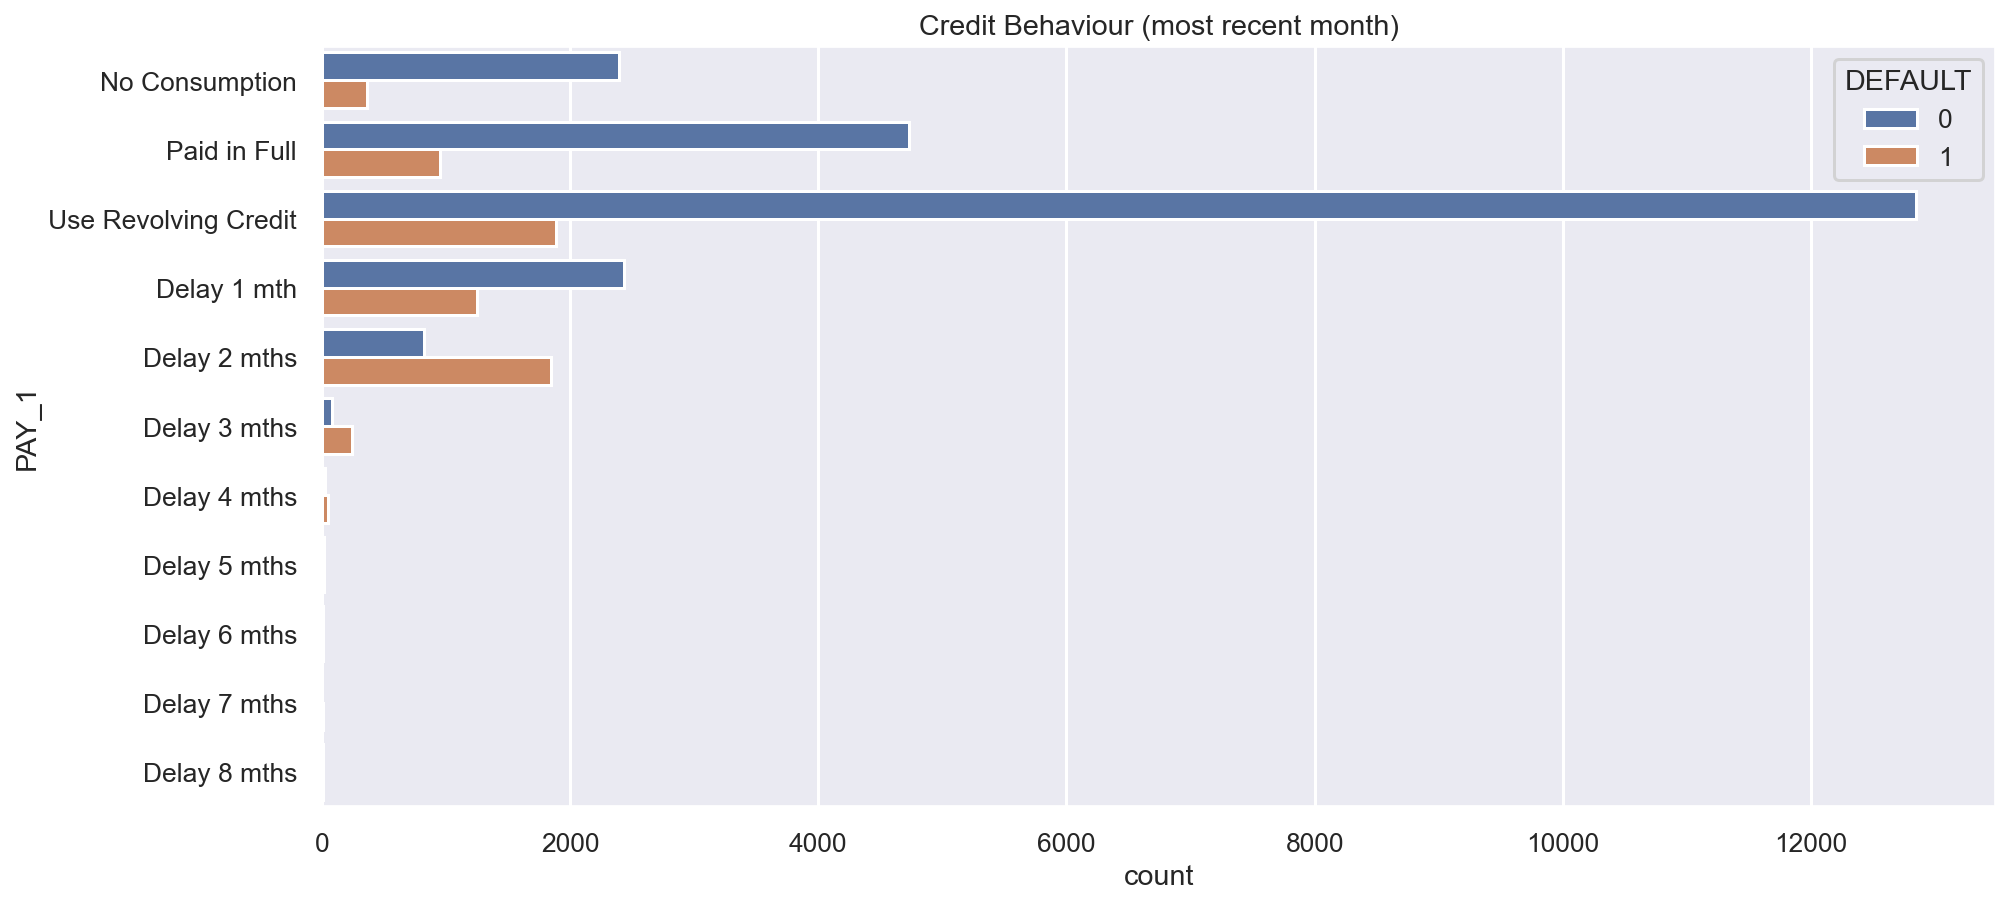

In [17]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)

pay1 = sns.countplot(y="PAY_1", hue='DEFAULT', data=df)
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

plt.show()

In [18]:
default0 = df.groupby(df['PAY_1'][df['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df.groupby(df['PAY_1'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('PAY_1').size().reset_index(name='TOTAL')

pay1Table = default0.join(default1['DEFAULT']).join(total['TOTAL'])
pay1Table['PAY_1'] = ['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths']

pay1Table

,PAY_1,NOT_DEFAULT,DEFAULT,TOTAL
0,No Consumption,2394,365,2759
1,Paid in Full,4732,954,5686
2,Use Revolving Credit,12849,1888,14737
3,Delay 1 mth,2436,1252,3688
4,Delay 2 mths,823,1844,2667
5,Delay 3 mths,78,244,322
6,Delay 4 mths,24,52,76
7,Delay 5 mths,13,13,26
8,Delay 6 mths,5,6,11
9,Delay 7 mths,2,7,9


In [19]:
pay1Table['NOT_DEFAULT'] = round((default0['NOT_DEFAULT']/total['TOTAL'])*100,2)
pay1Table['DEFAULT'] = round((default1['DEFAULT']/total['TOTAL'])*100,2)

pay1Pct = pay1Table.iloc[:,0:3]
pay1Pct = pay1Pct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

pay1Pct

,PAY_1,NOT_DEFAULT(%),DEFAULT(%)
0,No Consumption,86.77,13.23
1,Paid in Full,83.22,16.78
2,Use Revolving Credit,87.19,12.81
3,Delay 1 mth,66.05,33.95
4,Delay 2 mths,30.86,69.14
5,Delay 3 mths,24.22,75.78
6,Delay 4 mths,31.58,68.42
7,Delay 5 mths,50.00,50.00
8,Delay 6 mths,45.45,54.55
9,Delay 7 mths,22.22,77.78


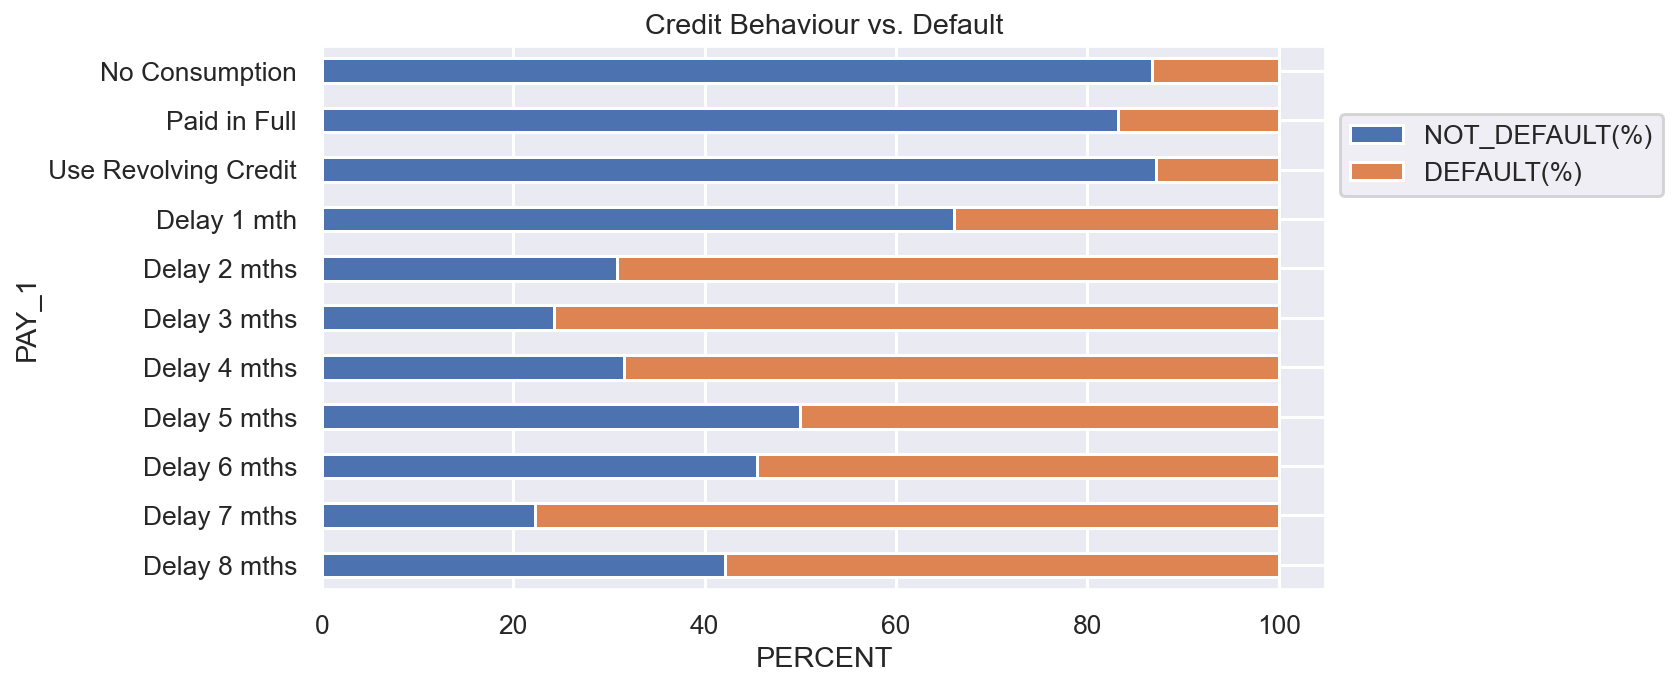

In [20]:
sns.set(rc={'figure.figsize':(9,5)})
sns.set_context("talk", font_scale=0.8)

ax = pay1Pct.sort_index(ascending=False).plot(x='PAY_1', kind='barh', stacked=True, title='Credit Behaviour vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()

#### Summary (Credit Behaviour vs. Default)
##### - Those Using Revolving Credit (paid only minimum) and those delayed for 2 months have the highest Default Count.
##### - When payment is delayed more than 2 months, the chances of default goes higher than 50%

## 3. Incomplete Description
##### - One of the contradicting information is those who Paid in Full in recent month, turn out to be default. Shown in chart above.
##### - Some client paid more than they should be, resulting a Negative Bill Amount. But still end up being default. Refer table below.
##### - Some client Bill Amount is much higher than their Credit Limit provided, which seldom happen in real case. Refer 2nd table below.

In [21]:
error1 = df.query('BILL_AMT1 < 0 and DEFAULT == 1').loc[:,('ID','BILL_AMT1','DEFAULT')]
error1.sample(5)

,ID,BILL_AMT1,DEFAULT
1334,1335,-140.0,1
18960,18961,-792.0,1
8666,8667,-22.0,1
3470,3471,-4.0,1
3962,3963,-8.0,1


In [22]:
error2 = df.query('BILL_AMT1 > LIMIT_BAL').loc[:,('ID','LIMIT_BAL','BILL_AMT1')]
error2.sample(5)

,ID,LIMIT_BAL,BILL_AMT1
26347,26348,240000.0,294180.0
16034,16035,110000.0,182235.0
25494,25495,110000.0,113003.0
15191,15192,220000.0,224166.0
10238,10239,50000.0,50430.0


### Visualize Numerical Data with Histogram

Explore Age vs. Default

In [23]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


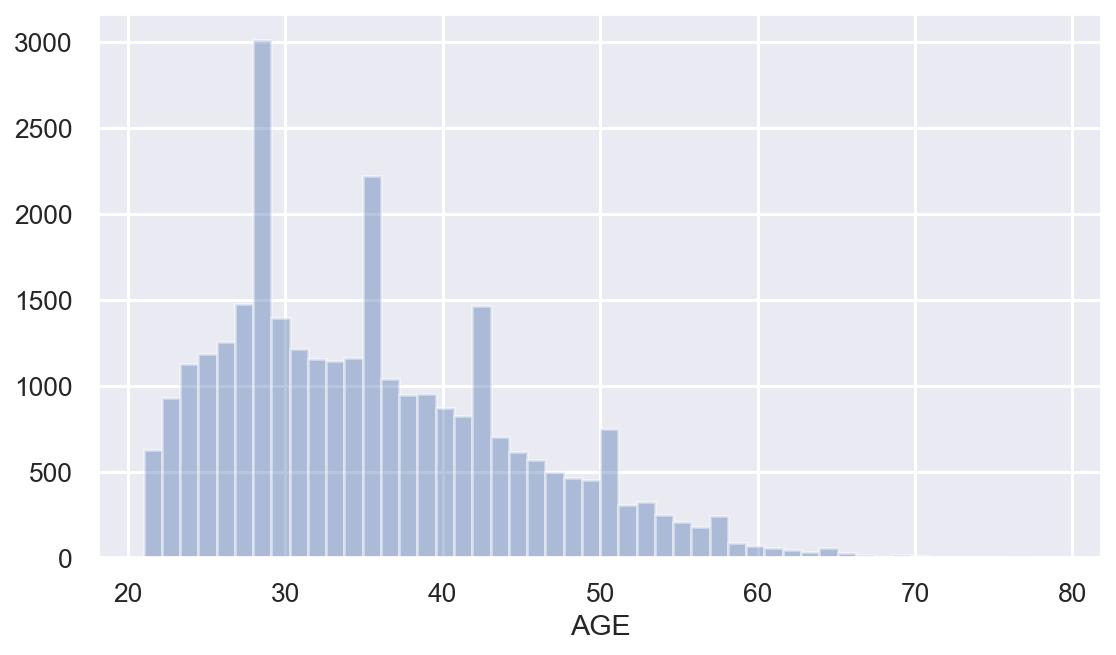

In [24]:
sns.distplot(df['AGE'], norm_hist=False, kde=False);

##### (^) Summary
##### - Youngest client is 21 years old, and oldest is 79.
##### - Most client is age range from 26 to 35.
##### - With some specific age group having extra high number of people.

### Compare All Client vs. Defaulted Clien

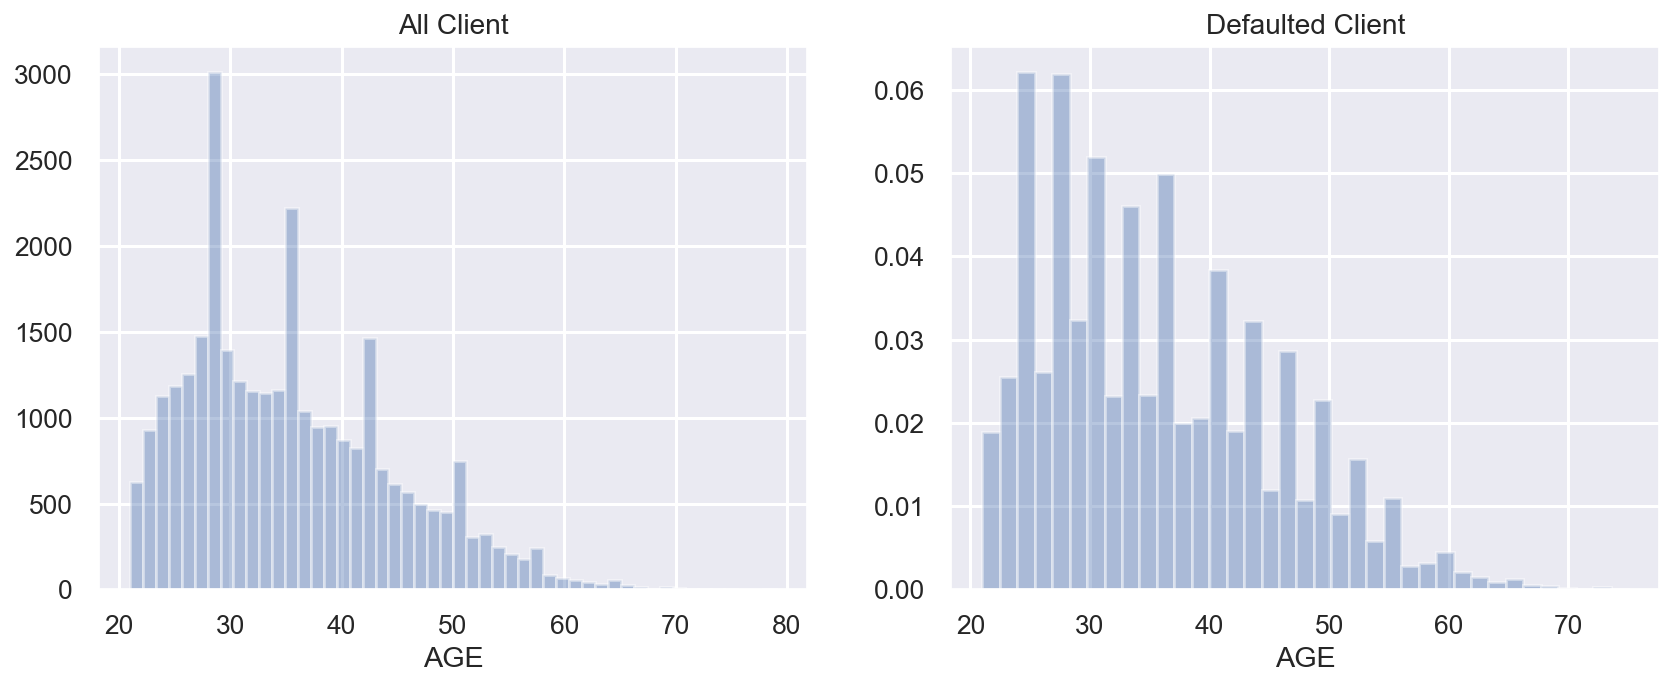

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

ax1.set_title('All Client', fontsize=14)
ax2.set_title('Defaulted Client', fontsize=14)

sns.distplot(df['AGE'], norm_hist=False, kde=False, ax=ax1);
sns.distplot(df['AGE'][df['DEFAULT'] == 1], norm_hist=True, kde=False, ax=ax2);

In [26]:
default0 = df.groupby(df['AGE'][df['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default0 = default0.fillna(0)
default1 = df.groupby(df['AGE'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
default1 = default1.fillna(0)
total = df.groupby('AGE').size().reset_index(name='TOTAL')

ageTable = total.join(default0.set_index('AGE'),on='AGE').join(default1.set_index('AGE'),on='AGE')
ageTable = ageTable[['AGE', 'NOT_DEFAULT', 'DEFAULT', 'TOTAL']]
ageTable = ageTable.fillna(0)
ageTable

,AGE,NOT_DEFAULT,DEFAULT,TOTAL
0,21,53,14.0,67
1,22,391,169.0,560
2,23,684,247.0,931
3,24,827,300.0,1127
4,25,884,302.0,1186
5,26,1003,253.0,1256
6,27,1164,313.0,1477
7,28,1123,286.0,1409
8,29,1292,313.0,1605
9,30,1121,274.0,1395


In [27]:
ageTable['NOT_DEFAULT'] = round((ageTable['NOT_DEFAULT']/ageTable['TOTAL'])*100,2)
ageTable['DEFAULT'] = round((ageTable['DEFAULT']/ageTable['TOTAL'])*100,2)

agePct = ageTable.iloc[:,0:3]
agePct = agePct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

agePct

,AGE,NOT_DEFAULT(%),DEFAULT(%)
0,21,79.10,20.90
1,22,69.82,30.18
2,23,73.47,26.53
3,24,73.38,26.62
4,25,74.54,25.46
5,26,79.86,20.14
6,27,78.81,21.19
7,28,79.70,20.30
8,29,80.50,19.50
9,30,80.36,19.64


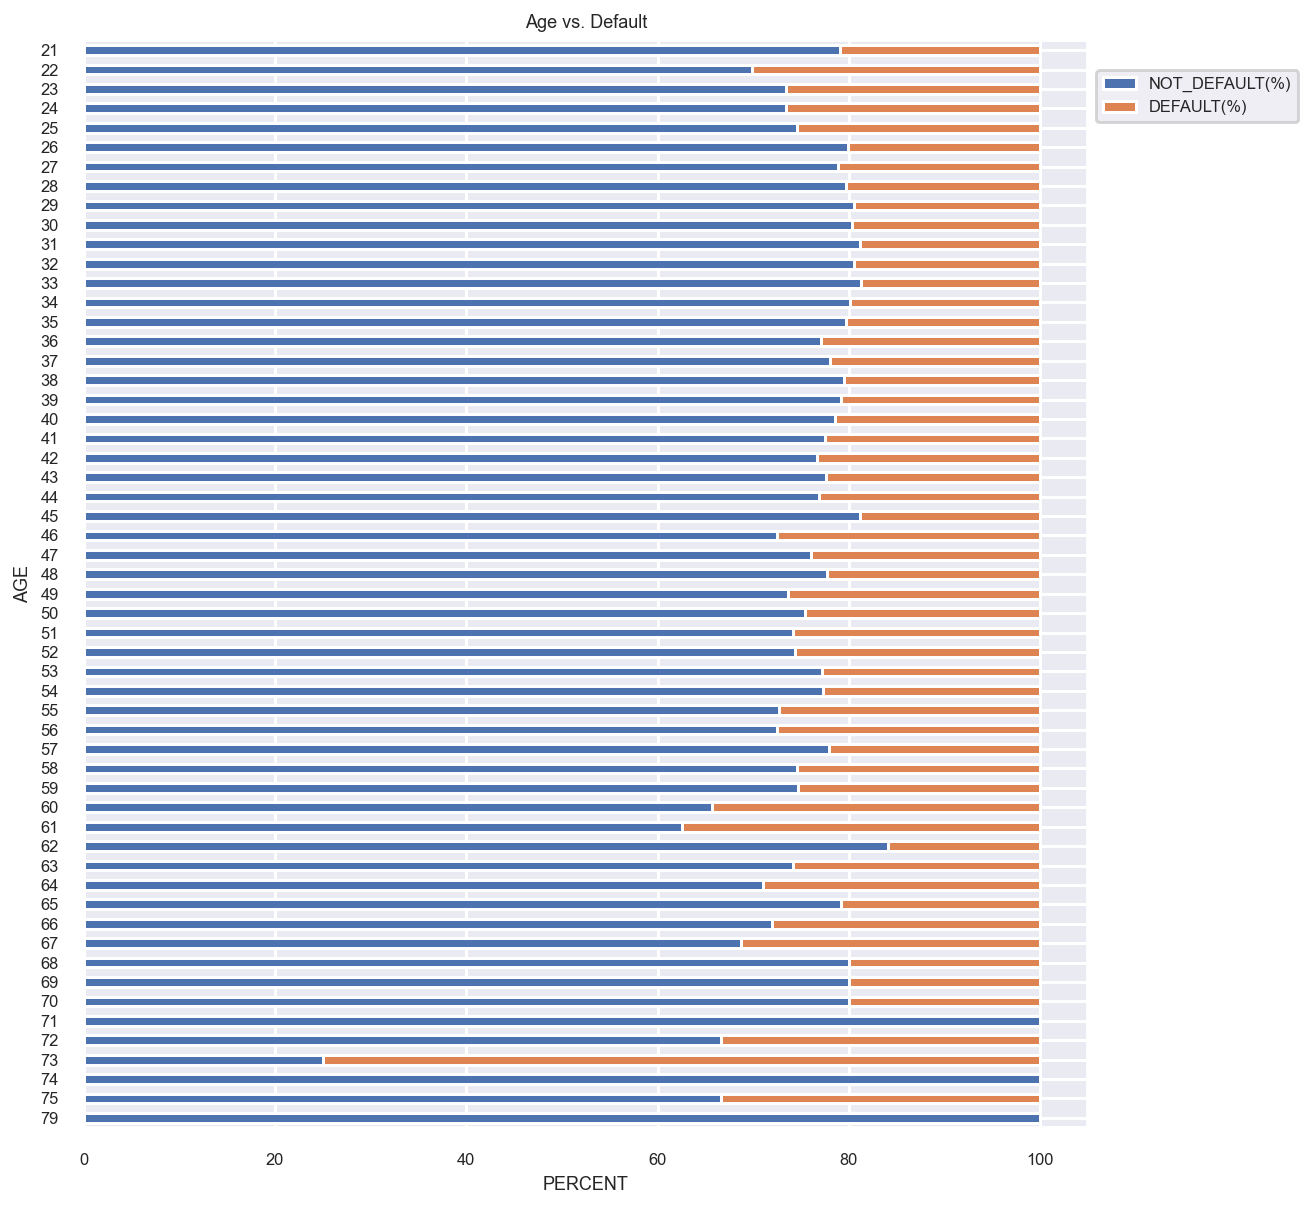

In [28]:
sns.set(rc={'figure.figsize':(9,10)})
sns.set_context("talk", font_scale=0.5)

ax = agePct.sort_index(ascending=False).plot(x='AGE', kind='barh', stacked=True, title='Age vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.98))
plt.show()

#### - For each age group > 60, we only have few data. So the percentage may not be reliable.
#### - Take a close look at age range from 26 to 35, they have comparative lower default rate. This is also supported by large amount of data.

# Modelling with Logistic Regression

## Build a Logistic Regression Classification model to predict Default probability, based on mixed variables

In [29]:
X = df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE'
        ,'PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'
        ,'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'
        ,'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
y = df['DEFAULT'] 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.metrics import accuracy_score

logmodel = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy_score(y_test,predictions)

0.784

# Modelling with Demographic data

In [32]:
X = df[['SEX','EDUCATION','MARRIAGE','AGE']]
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy_score(y_test,predictions)

0.7842222222222223

# Modelling with Credit Behaviour data

In [34]:
X = df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy_score(y_test,predictions)

0.8142222222222222

# Modelling with single independent variable

In [35]:
X = df[['PAY_1']]
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy_score(y_test,predictions)

0.8265555555555556